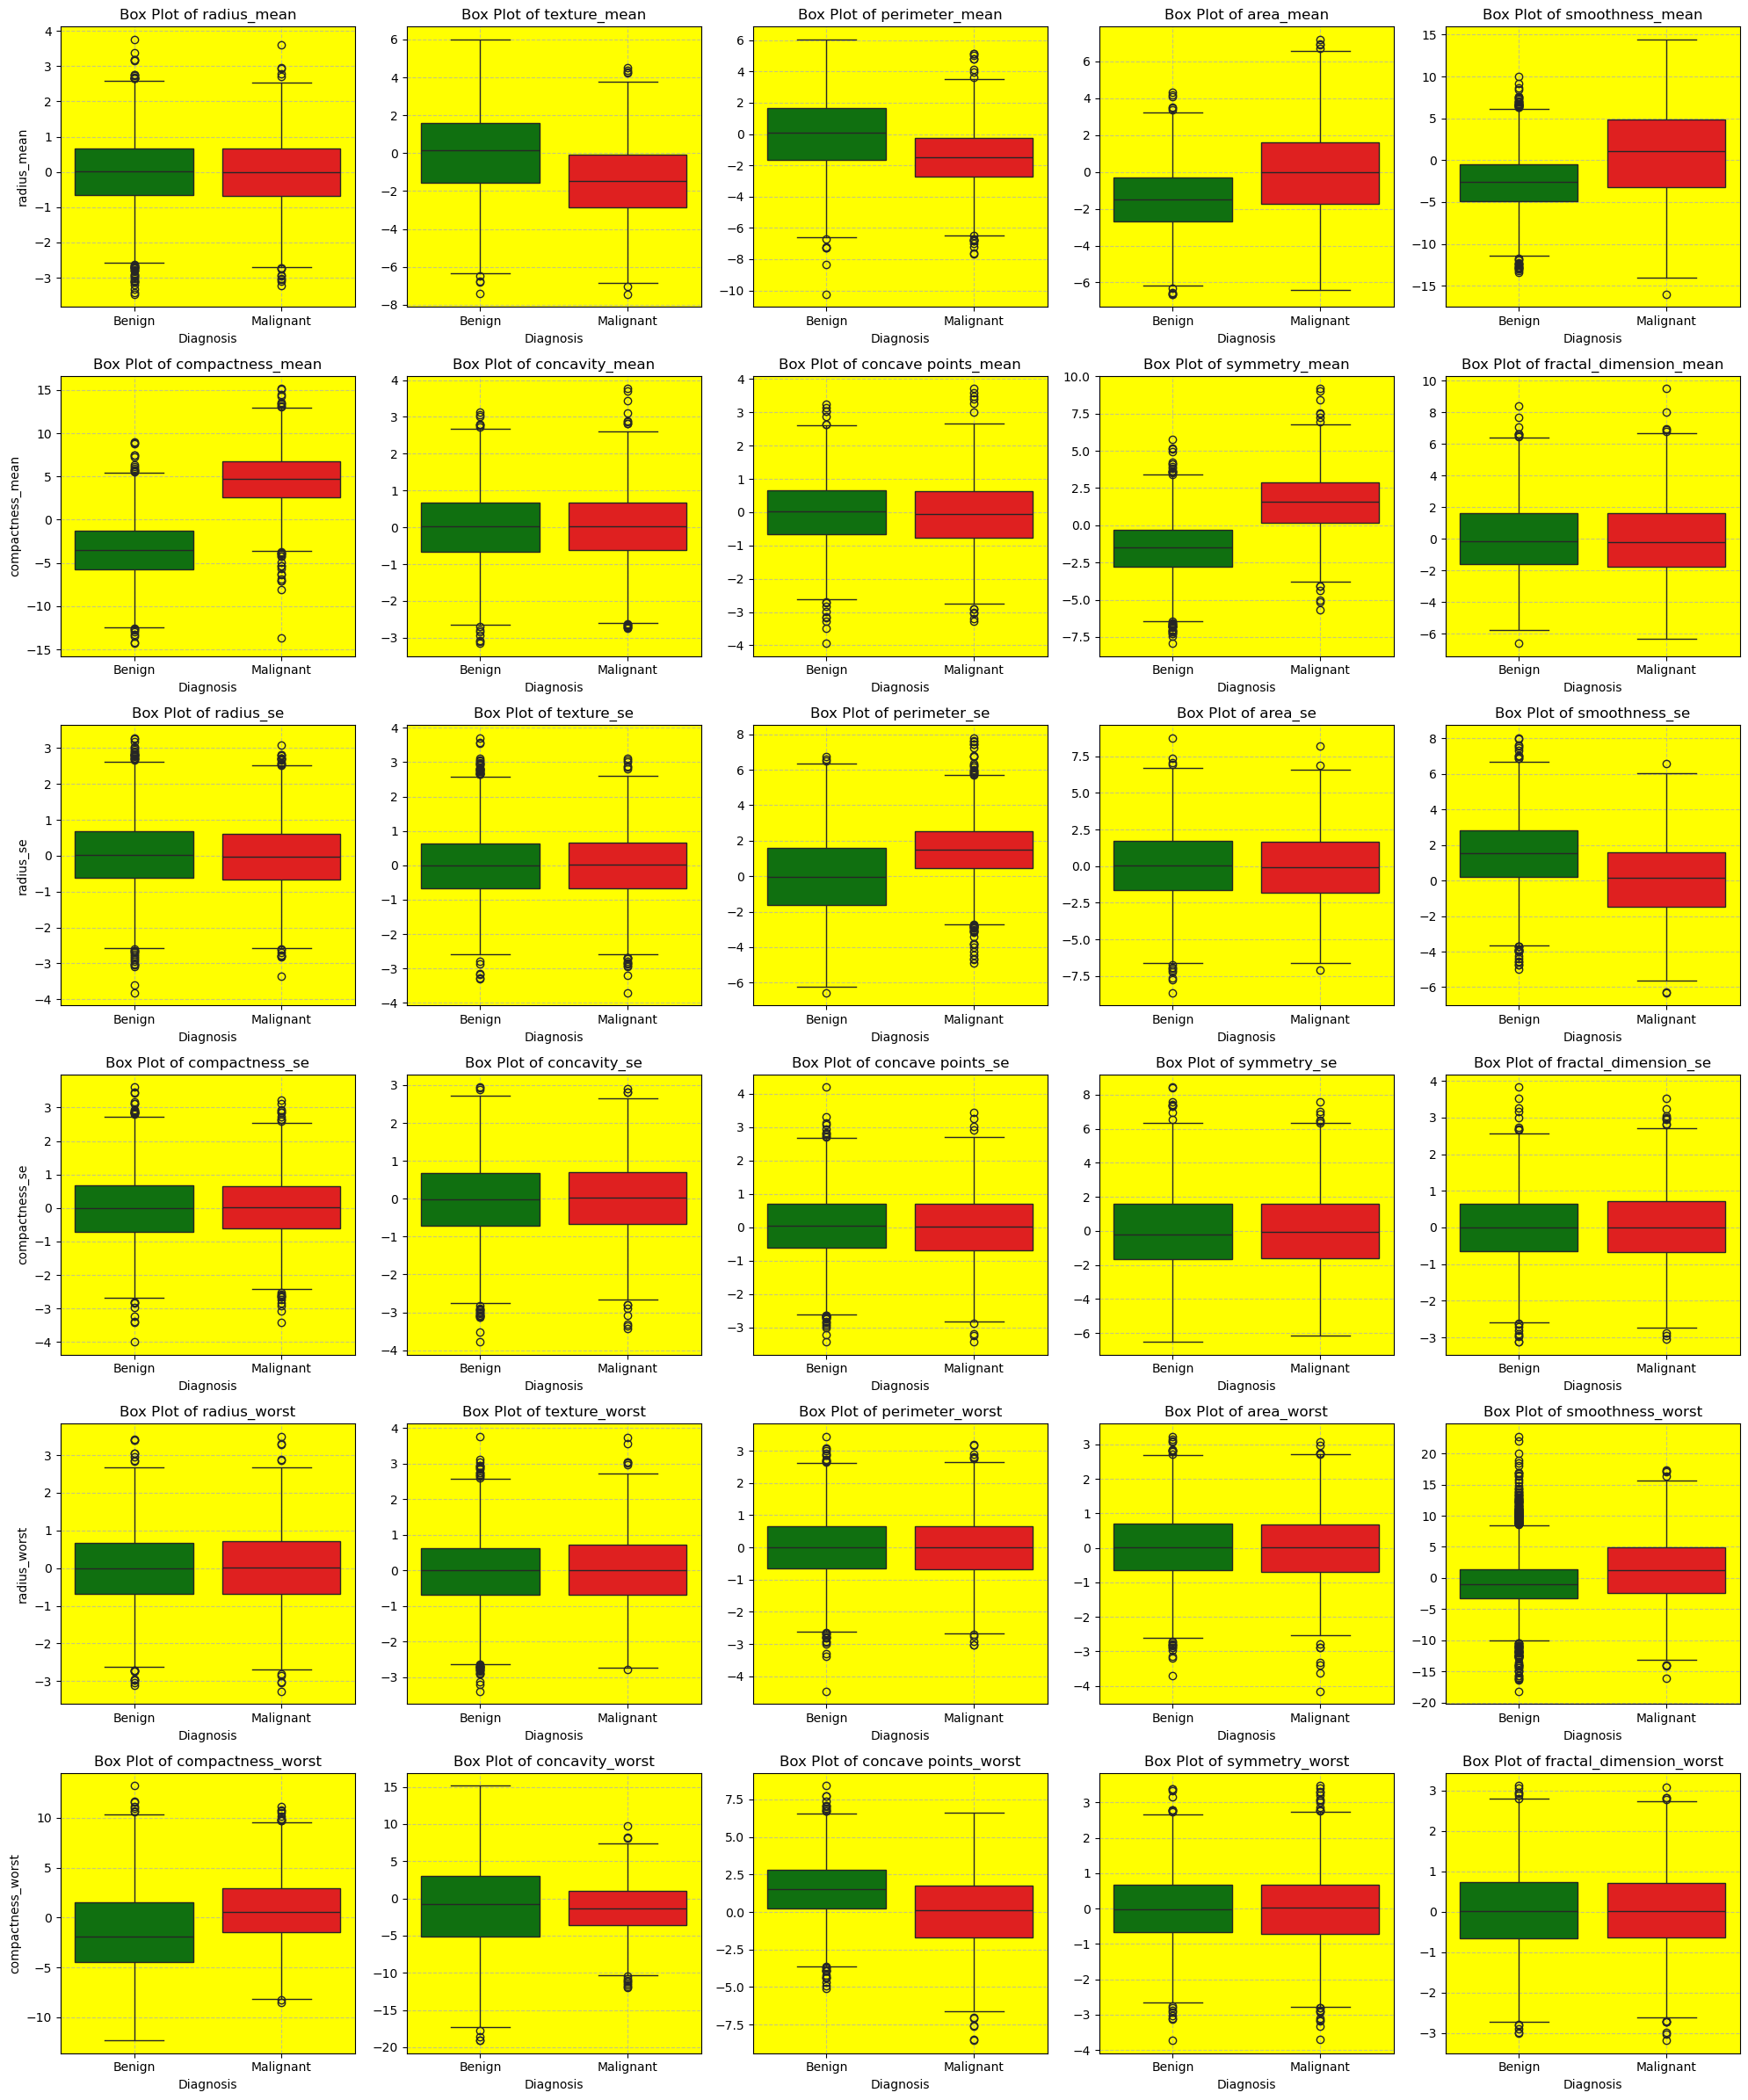

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
#Importation and Loading of Datasets
df = pd.read_csv('breast_cancer_updated.csv', index_col=0)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Replace this with your data loading logic (e.g., df = pd.read_csv('your_file.csv'))

# Select numerical columns (excluding non-numeric like 'id' or 'diagnosis' if present)
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Set up the grid for 5 columns
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Dynamic rows based on number of columns

# Create a figure
plt.figure(figsize=(20, 4 * n_rows))

# Custom palette for benign (green) and malignant (red)
custom_palette = ['green', 'red']

# Create box plots for all numerical features
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Set background color to yellow
    plt.gca().set_facecolor('yellow')
    
    # Create box plot
    sns.boxplot(data=df, x='diagnosis', y=col, palette=custom_palette)
    
    # Add titles and labels
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Diagnosis')
    plt.ylabel(col if i % n_cols == 1 else '')  # Label only the first column of each row
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])  # Label x-axis explicitly
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()